In [13]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv('/Users/kartik/Downloads/Cloud-Coverage-master/Cloud_Coverage.csv', low_memory=False)

In [15]:
data.head()

,DATE (MM/DD),MST,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
0,01-Jan,00:00,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0
1,01-Jan,00:01,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0
2,01-Jan,00:02,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0
3,01-Jan,00:03,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0
4,01-Jan,00:04,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0


In [16]:
data['Total Cloud Cover [%]'].value_counts()

Total Cloud Cover [%]
0.0     248275
99.0      9943
98.0      8832
97.0      7999
96.0      6900
         ...  
54.0      1006
55.0      1006
48.0      1002
56.0       996
1.0        697
Name: count, Length: 101, dtype: int64

In [17]:
data_date = data['DATE (MM/DD)'].str.split("-", n=1 ,expand=True)
data['month'] = data_date[0]
data['day'] = data_date[1]
for i in range(len(data)):
    if (data['month'][i] == '11' or data['month'][i]== '10' or data['month'][i] == '09'  or data['month'][i]== '08' or data['month'][i]== '07' or data['month'][i]== '06' or data['month'][i]== '05' 
    or data['month'][i]== '04' or data['month'][i]== '03' or data['month'][i]== '02' or data['month'][i]== "01" or data['month'][i]== '12'):
        temp = data.at[i, 'month']
        data.at[i, 'month'] = data.at[i, 'day']
        data.at[i, 'day'] = temp
    else:
        pass

dataclean = data.drop('DATE (MM/DD)', axis=1)

In [18]:
data_time = dataclean['MST'].str.split(":", n=1 , expand = True)
dataclean['hour'] = data_time[0]
dataclean['sec'] = data_time[1]
dataclean = dataclean.drop('MST', axis = 1)
#dataclean2.head()

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
data_cat = dataclean[['month']]
data_1hot = cat_encoder.fit_transform(data_cat)

In [20]:
#dataclean['month'].value_counts()

In [21]:
#dataclean['day'].value_counts()

In [22]:
dataclean.head()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),month,day,hour,sec
0,-0.962276,0.000000,356.85640,7.216,0.988,-7.312,32.33,0.0,9.95,271.3,806.779,0.0,0.219,0.0,0.0,Jan,01,00,00
1,-0.937921,0.000000,357.65505,7.251,1.040,-7.260,32.40,0.0,8.20,272.9,806.840,0.0,0.206,0.0,0.0,Jan,01,00,01
2,-0.944395,0.000000,358.45438,7.256,1.093,-7.207,32.54,0.0,6.70,288.8,806.876,0.0,0.148,0.0,0.0,Jan,01,00,02
3,-0.951350,-0.029673,359.25416,7.254,1.060,-7.440,31.89,0.0,7.70,294.0,806.823,0.0,0.235,0.0,0.0,Jan,01,00,03
4,-0.934976,-0.054401,0.05415,7.331,1.081,-7.419,31.78,0.0,7.20,285.5,806.762,0.0,0.182,0.0,0.0,Jan,01,00,04


In [23]:
#data.describe()

In [24]:
dataclean = dataclean.dropna(subset=["Total Cloud Cover [%]"])
dataclean.describe()

,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Total Cloud Cover [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11)
count,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000,480931.000000
mean,202.584859,240.811688,179.994941,12.448951,5.056679,-2.705546,40.346797,23.611655,2.829506,168.304200,817.087423,0.374050,-2.838693,0.061664,0.129042
std,295.433294,368.978939,101.708327,10.573450,6.864419,7.315521,24.052311,34.740024,2.020415,116.387099,5.136926,1.928075,189.204941,0.237765,0.180245
min,-4.764200,-12.403300,0.000120,-16.690000,-17.351000,-24.830000,4.210000,0.000000,0.000000,0.000000,794.918000,0.000000,-7999.000000,0.000000,0.000000
25%,-1.084005,-0.197821,88.465190,4.156000,-0.269000,-8.117000,21.990000,0.000000,1.450000,44.570000,813.988000,0.000000,0.082000,0.000000,0.000000
50%,6.950750,0.256761,179.944170,12.990000,5.348000,-3.127000,33.650000,0.000000,2.450000,178.200000,817.553000,0.000000,0.655000,0.000000,0.000000
75%,349.436000,534.244500,271.541050,20.760000,11.082000,2.661000,53.040000,37.000000,3.700000,282.200000,820.553000,0.000000,1.032000,0.000000,0.201700
max,1428.650000,1069.200000,359.998560,36.320000,19.416000,17.418000,100.100000,100.000000,23.450000,360.000000,847.963000,28.190000,28.430000,1.000000,2.000000


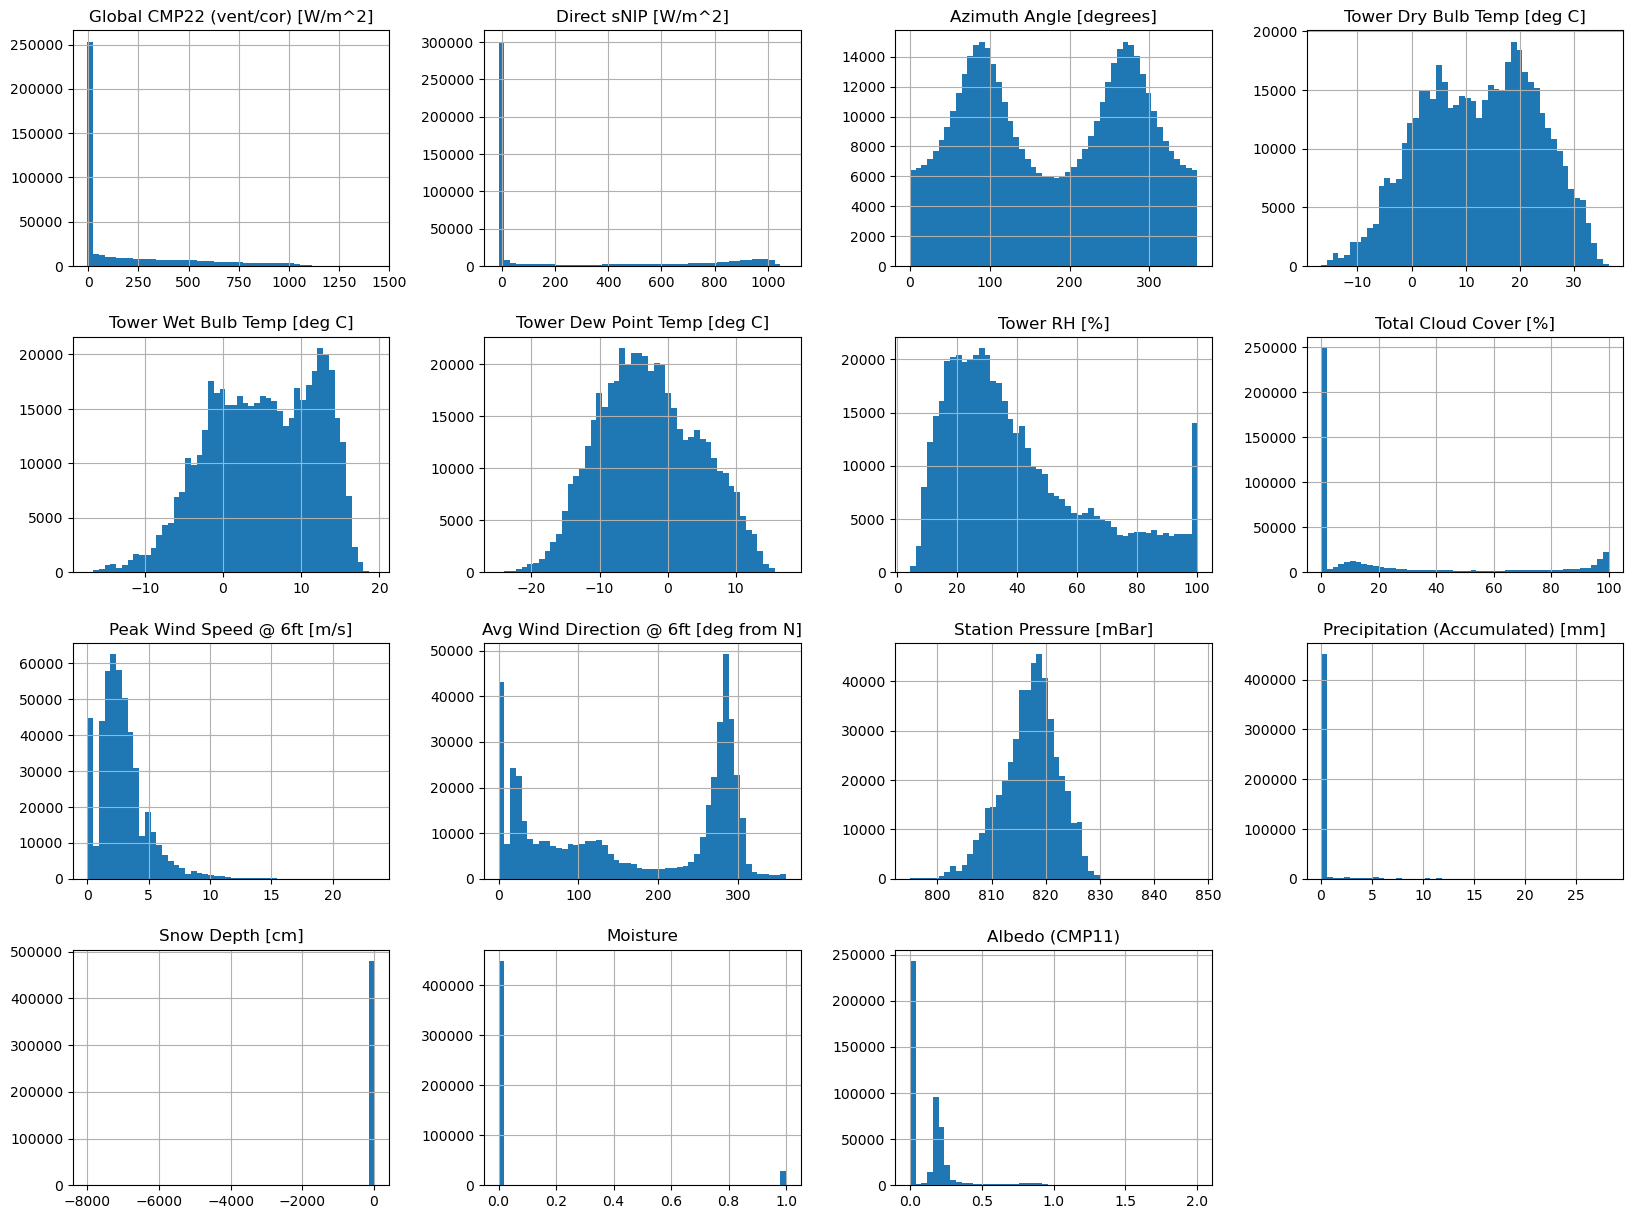

In [25]:
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt
dataclean.hist(bins=50, figsize=(20,15))
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
train_set, test_set = train_test_split(dataclean, test_size=0.20, random_state=42)
X = train_set.drop('Total Cloud Cover [%]' , axis = 1)
y = train_set['Total Cloud Cover [%]']


In [28]:
#dataclean['Total Cloud Cover [%]'].value_counts()

In [29]:
X.head()


,Global CMP22 (vent/cor) [W/m^2],Direct sNIP [W/m^2],Azimuth Angle [degrees],Tower Dry Bulb Temp [deg C],Tower Wet Bulb Temp [deg C],Tower Dew Point Temp [deg C],Tower RH [%],Peak Wind Speed @ 6ft [m/s],Avg Wind Direction @ 6ft [deg from N],Station Pressure [mBar],Precipitation (Accumulated) [mm],Snow Depth [cm],Moisture,Albedo (CMP11),month,day,hour,sec
496807,-0.956021,-0.592529,10.28184,-4.233,-4.263,-4.363,98.90,1.20,65.10,812.971,0.0,0.502,1.0,0.0000,Nov,12,00,07
153304,304.449000,1.528240,153.01367,-3.550,-3.701,-3.801,97.90,4.20,18.52,815.370,0.0,14.610,1.0,0.9198,Apr,16,11,04
395607,11.453000,2.483630,263.48856,15.440,7.240,-0.860,32.43,0.00,0.00,824.222,0.0,-0.111,0.0,0.1494,Jan,10,17,27
457975,-1.052030,-0.291319,40.23480,9.330,2.322,-6.678,29.59,12.45,276.60,802.389,0.0,0.082,0.0,0.0000,Nov,14,00,55
283273,82.049800,8.102700,278.84599,22.120,15.832,12.532,54.54,1.45,196.00,819.344,0.0,1.097,0.0,0.2000,Jul,15,17,13


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

num_pipeline = Pipeline([
('std_scaler', StandardScaler()),
])
X_num = X.drop('month',axis = 1)

In [31]:
from sklearn.compose import ColumnTransformer
num_attribs = list(X_num)
cat_attribs = ['month']
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
X_prepared = full_pipeline.fit_transform(X)

In [32]:
lin_reg = LinearRegression()

model_1 = lin_reg.fit(X_prepared,y)


In [33]:
X_poly = poly_features.fit_transform(X_prepared)

model_2 = lin_reg.fit(X_poly , y)

In [34]:
X_test = test_set.drop('Total Cloud Cover [%]' , axis = 1)
y_test = test_set['Total Cloud Cover [%]']

all_data = X_test.iloc[:]

X_test_prepared = full_pipeline.transform(all_data)
X_test_prepared_poly = poly_features.fit_transform(X_test_prepared)


#print("Predictions:", lin_reg.predict(some_data_prepared_poly))
#print("Labels:", list(some_labels))

In [35]:
#X_test_predictions1 = model_1.predict(X_test_prepared)
X_test_predictions2 = model_2.predict(X_test_prepared_poly)

In [36]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, X_test_predictions2)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

14.23984064166523


In [37]:
print("Predictions:", X_test_predictions2[:20])
print("Labels:", list(y_test[:20]))

Predictions: [  3.5869751    1.41906738  -2.23132324   9.03491211  14.70578003
   6.7935791   -2.63432312   0.28796387   4.76495361   2.97093964
   2.24841309   4.5          0.97849274 105.29144287  17.2956543
  90.57214355  93.99856567  19.31384277  20.03210449   3.54284668]
Labels: [0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 91.0, 11.0, 91.0, 69.0, 19.0, 33.0, 9.0]


In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_2, X_test_prepared_poly, y_test,
scoring="neg_mean_squared_error", cv=10)

In [39]:
rmse_scores = np.sqrt(-scores)
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())

Scores: [-194.78810756 -195.83959007 -208.55753987 -206.78733168 -209.08938828
 -207.05640299 -212.31222302 -204.18884694 -202.87197874 -205.4049442 ]
Mean: -204.6896353346949
Standard deviation: 5.318403504985874


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train_prepared_poly, y)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [42]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [ ]:
# from sklearn.linear_model import Lasso
# lasso_reg = Lasso(alpha=0.01)
# model_3 = lasso_reg.fit(X_poly, y)

In [ ]:
# scores = cross_val_score(model_3, X_poly, y,
# scoring="neg_mean_squared_error", cv=10)